In [1]:
# The following code is a classification neural network

# Import all packages and libraries for NN

# from numpy.random import seed
# seed(1)
# from tensorflow import set_random_seed
# set_random_seed(2)

from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense
from sklearn.utils import shuffle
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import argmax
from keras.utils import to_categorical
from matplotlib import pyplot

import numpy
import keras
import pandas
import collections


Using TensorFlow backend.


In [2]:
# Data Processing
# Preparing Iris dataset for usage as a dataframe
# Encoding output variables
# Shuffle rows randomly for variety
# Spliting dataset to test and train dataframes. Test dataset will be 80% of entire dataframe.
# Parsing dataframe to features and labels (x_train and y_train)

# Constants
_training_split = 0.8


# Spliting dataframe to training and testing
def split_to_training(dataframe):
    train_df = dataframe[:int(len(dataframe)*_training_split)]
    
    return train_df


def split_to_testing(dataframe):
    test_df = dataframe[int(len(dataframe)*_training_split):]
    
    return test_df


# Spliting training or testing dataset to x and y
def split_to_x(dataframe):
    x = dataframe[features].values
    
    return x


def split_to_y(dataframe):
    y = dataframe[labels].values
    
    return y


# Encoding all labels with HOT Encoder
def encode_dataframe(label_y):
    encoder = LabelEncoder()
    encoder.fit(label_y)
    encoded_Y = encoder.transform(label_y)
    new_y = np_utils.to_categorical(encoded_Y)
    
    return new_y


def prep_data(df):
    pass
    
# Load in dataset
dataframe = pandas.read_csv('iris.csv')
df = shuffle(dataframe)
features = list(df.columns.values)[:-1]
labels = list(df.columns.values)[-1]
input_dim = len(list(df.columns.values)[:-1])

train_df = split_to_training(df)
x_train = split_to_x(train_df)
y_train = encode_dataframe(split_to_y(train_df))

test_df = split_to_testing(df)
x_test = split_to_x(test_df)
y_test = encode_dataframe(split_to_y(test_df))



In [3]:
class KerasNeuralNetwork:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        
        
    def run(self):
        _number_of_test_models = 2
        
        base_number_layers = int(input_dim**.5)
#       group_models { loss_value: respective model {}
        group_models = {}

        for i in range(_number_of_test_models):
            model = Sequential()
            
            # Base number of layers
            model.add(Dense(input_dim, input_dim=input_dim))
            
            # Loop adds an extra hidden layer after each individual model is trained
            for i in range(base_number_layers):
                model.add(Dense(4, activation='relu'))
            model.add(Dense(3, activation='softmax'))
        
            model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
            history = model.fit(self.x_train, self.y_train, epochs=150, validation_split=0.2)                 
            scores = model.evaluate(self.x_test, self.y_test)
            
            
            # Map each loss with its respective model
            # Note that group_models[0] = 'model object' and group_models[1] = the'history object'
            group_models[scores[0]] = model, history
                                    
            pyplot.plot(history.history['loss'])
            pyplot.plot(history.history['val_loss'])
            pyplot.title('Loss After Each Epoch')
            pyplot.ylabel('loss')
            pyplot.xlabel('epoch')
            
            print("{}: {}".format(model.metrics_names[0], scores[0]))
            print("{}: {}%".format(model.metrics_names[1], scores[1]*100))
            base_number_layers += 1
        
        pyplot.legend(['2HL','val_2HL','3HL','val_3HL'], loc='upper right')
        pyplot.show()
        
        # sort the dictionary
        ordered_group_models = collections.OrderedDict(sorted(group_models.items()))
        
        
        # Use models starting from the lowest loss. If it is overfitted, take the second lowest loss and so on.
        
        overfitted = False
        optimized_model = None
        
        for key, value in ordered_group_models.items():
            list_of_loss = value[1].history['loss']
            list_of_val_loss = value[1].history['val_loss']
            
            for i in range(len(list_of_loss)):
                if list_of_loss[i] < list_of_val_loss[i]:
                    overfitted = True
                    break # the model is overfitted
                    
            if not overfitted:
                optimized_model = value[0]
                optimized_history = value[1]
                break # exit loop because we have found optimized model
                
            overfitted = False
        
        if not optimized_model:
            print('All models are overfitted')
        else:   
            # Evaluating the optimized model
            evaluation = optimized_model.evaluate(self.x_test, self.y_test)
            print("{}: {}".format(optimized_model.metrics_names[0], evaluation[0]))
            print("{}: {}%".format(optimized_model.metrics_names[1], evaluation[1]*100))

            print('Number of hidden layers: '+ str(len(optimized_model.get_config()) - 2))
            print(optimized_model.get_config()[-1]['config']['activation'])


            pyplot.plot(optimized_history.history['loss'])
            pyplot.plot(optimized_history.history['val_loss'])
            pyplot.title('Loss and Val_Loss vs Epoch')
            pyplot.ylabel('loss')
            pyplot.xlabel('epoch')
            pyplot.legend(['Loss','Val_Loss'], loc='upper right')
            pyplot.show()
        

Train on 96 samples, validate on 24 samples
Epoch 1/150
96/96 [==============================] - 0s 5ms/step - loss: 0.4446 - acc: 0.3125 - val_loss: 0.4162 - val_acc: 0.4583
Epoch 2/150
96/96 [==============================] - 0s 126us/step - loss: 0.4426 - acc: 0.3125 - val_loss: 0.4160 - val_acc: 0.4583
Epoch 3/150
96/96 [==============================] - 0s 105us/step - loss: 0.4409 - acc: 0.3125 - val_loss: 0.4158 - val_acc: 0.4583
Epoch 4/150
96/96 [==============================] - 0s 119us/step - loss: 0.4391 - acc: 0.3125 - val_loss: 0.4155 - val_acc: 0.4583
Epoch 5/150
96/96 [==============================] - 0s 105us/step - loss: 0.4375 - acc: 0.3125 - val_loss: 0.4154 - val_acc: 0.4583
Epoch 6/150
96/96 [==============================] - 0s 100us/step - loss: 0.4360 - acc: 0.3125 - val_loss: 0.4153 - val_acc: 0.4583
Epoch 7/150
96/96 [==============================] - 0s 100us/step - loss: 0.4342 - acc: 0.3125 - val_loss: 0.4150 - val_acc: 0.4583
Epoch 8/150
96/96 [========

Epoch 62/150
96/96 [==============================] - 0s 100us/step - loss: 0.3300 - acc: 0.6771 - val_loss: 0.2861 - val_acc: 0.6667
Epoch 63/150
96/96 [==============================] - 0s 117us/step - loss: 0.3284 - acc: 0.6771 - val_loss: 0.2842 - val_acc: 0.6667
Epoch 64/150
96/96 [==============================] - 0s 155us/step - loss: 0.3269 - acc: 0.6771 - val_loss: 0.2824 - val_acc: 0.6667
Epoch 65/150
96/96 [==============================] - 0s 125us/step - loss: 0.3254 - acc: 0.6771 - val_loss: 0.2807 - val_acc: 0.6667
Epoch 66/150
96/96 [==============================] - 0s 132us/step - loss: 0.3240 - acc: 0.6771 - val_loss: 0.2789 - val_acc: 0.6667
Epoch 67/150
96/96 [==============================] - 0s 156us/step - loss: 0.3225 - acc: 0.6771 - val_loss: 0.2773 - val_acc: 0.6667
Epoch 68/150
96/96 [==============================] - 0s 140us/step - loss: 0.3212 - acc: 0.6771 - val_loss: 0.2756 - val_acc: 0.6667
Epoch 69/150
96/96 [==============================] - 0s 175us

Epoch 123/150
96/96 [==============================] - 0s 132us/step - loss: 0.2843 - acc: 0.6771 - val_loss: 0.2346 - val_acc: 0.6667
Epoch 124/150
96/96 [==============================] - 0s 110us/step - loss: 0.2839 - acc: 0.6771 - val_loss: 0.2343 - val_acc: 0.6667
Epoch 125/150
96/96 [==============================] - 0s 124us/step - loss: 0.2836 - acc: 0.6771 - val_loss: 0.2340 - val_acc: 0.6667
Epoch 126/150
96/96 [==============================] - 0s 132us/step - loss: 0.2832 - acc: 0.6771 - val_loss: 0.2336 - val_acc: 0.6667
Epoch 127/150
96/96 [==============================] - 0s 113us/step - loss: 0.2829 - acc: 0.6771 - val_loss: 0.2333 - val_acc: 0.6667
Epoch 128/150
96/96 [==============================] - 0s 111us/step - loss: 0.2826 - acc: 0.6771 - val_loss: 0.2330 - val_acc: 0.6667
Epoch 129/150
96/96 [==============================] - 0s 135us/step - loss: 0.2822 - acc: 0.6771 - val_loss: 0.2326 - val_acc: 0.6667
Epoch 130/150
96/96 [==============================] - 

Epoch 33/150
96/96 [==============================] - 0s 145us/step - loss: 0.3466 - acc: 0.5729 - val_loss: 0.3029 - val_acc: 0.6667
Epoch 34/150
96/96 [==============================] - 0s 141us/step - loss: 0.3445 - acc: 0.5729 - val_loss: 0.2998 - val_acc: 0.6667
Epoch 35/150
96/96 [==============================] - 0s 140us/step - loss: 0.3423 - acc: 0.5729 - val_loss: 0.2968 - val_acc: 0.6667
Epoch 36/150
96/96 [==============================] - 0s 125us/step - loss: 0.3401 - acc: 0.5729 - val_loss: 0.2939 - val_acc: 0.6667
Epoch 37/150
96/96 [==============================] - 0s 145us/step - loss: 0.3381 - acc: 0.5729 - val_loss: 0.2911 - val_acc: 0.6667
Epoch 38/150
96/96 [==============================] - 0s 164us/step - loss: 0.3362 - acc: 0.5833 - val_loss: 0.2884 - val_acc: 0.6667
Epoch 39/150
96/96 [==============================] - 0s 156us/step - loss: 0.3341 - acc: 0.5938 - val_loss: 0.2858 - val_acc: 0.6667
Epoch 40/150
96/96 [==============================] - 0s 163us

96/96 [==============================] - 0s 140us/step - loss: 0.2906 - acc: 0.6250 - val_loss: 0.2326 - val_acc: 0.7500
Epoch 95/150
96/96 [==============================] - 0s 128us/step - loss: 0.2902 - acc: 0.6250 - val_loss: 0.2323 - val_acc: 0.7500
Epoch 96/150
96/96 [==============================] - 0s 171us/step - loss: 0.2899 - acc: 0.6250 - val_loss: 0.2321 - val_acc: 0.7500
Epoch 97/150
96/96 [==============================] - 0s 124us/step - loss: 0.2896 - acc: 0.6250 - val_loss: 0.2319 - val_acc: 0.7500
Epoch 98/150
96/96 [==============================] - 0s 143us/step - loss: 0.2892 - acc: 0.6250 - val_loss: 0.2314 - val_acc: 0.7500
Epoch 99/150
96/96 [==============================] - 0s 157us/step - loss: 0.2889 - acc: 0.6250 - val_loss: 0.2308 - val_acc: 0.7500
Epoch 100/150
96/96 [==============================] - 0s 158us/step - loss: 0.2886 - acc: 0.6250 - val_loss: 0.2305 - val_acc: 0.7500
Epoch 101/150
96/96 [==============================] - 0s 210us/step - los

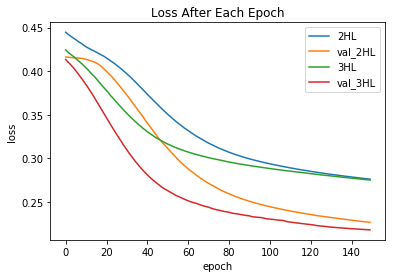

30/30 [==============================] - 0s 31us/step
loss: 0.2795863747596741
acc: 66.66666865348816%
Number of hidden layers: 3
softmax


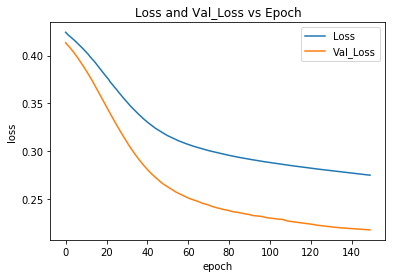

In [4]:
NN = KerasNeuralNetwork(x_train, y_train, x_test, y_test)
NN.run()
